EDA with MySQL 


Do the following  EDA by taking data from MY sql :

Create a table named studmarks in Mysql . Choose the column name and its datatypes accordingly to the students_marks .csv in github
Link https://github.com/dsrscientist/dataset1/blob/master/student_marks.csv



Load the data of students marks.csv into mysql database by load local infile command . 


Now open jupyter notebook ,make a connection with mysql ,fetch the data of students marks in notebook. (This process is known as data mining).


Now the data is loaded in jupyter notebook ,now start making evaluation of data using all steps of EDA(exploratory data analysis).

#Create Table
create table student_marks 
(
name varchar(15) not null ,
salary float not null,
Index  not null,
Gender varchar(15) not null,
DOB   date not null,
Maths int not null, 
Physics int not null,
Chemistry int not null,
English int not null,
Biology int not null,
Economics int not null,
History int not null,
Civics  int not null);

#load database using load inline 
SHOW global variable like 'local_infile';

SET global local_infile=true;
SHOW global variable like 'local_infile'; 


load data local infile 'c:/mysql/students_marks.csv' into table student_marks
fields terminated by ','
line terminated by '\r\n'   

In [ ]:
#import library

import mysql.connector

In [ ]:
#Connecting Database

mydbMarks=mysql.connector.connect(host='localhost',user='root',password='Melita@123',db='student_marks')

In [1]:
#import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
#Data import

student_marks=pd.read_sql_query("select * from marks",mydbMarks)

Identification of variables and data types

In [3]:
student_marks.head()

,Unnamed: 0,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53


In [7]:
#display information of dataset

student_marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     object
 1   Gender      10 non-null     object
 2   DOB         10 non-null     object
 3   Maths       10 non-null     int64 
 4   Physics     10 non-null     int64 
 5   Chemistry   10 non-null     int64 
 6   English     10 non-null     int64 
 7   Biology     10 non-null     int64 
 8   Economics   10 non-null     int64 
 9   History     10 non-null     int64 
 10  Civics      10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [5]:
#index change

student_marks.set_index('Unnamed: 0', inplace=True)

In [6]:
student_marks.head()

,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Unnamed: 0,,,,,,,,,,
John,M,05-04-1988,55,45,56,87,21,52,89,65
Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53


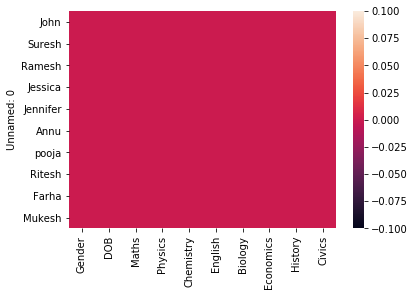

In [7]:
#Missing value check

sns.heatmap(student_marks.isnull())

In [8]:
student_marks.tail()

,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Unnamed: 0,,,,,,,,,,
Annu,F,05-04-1988,45,87,52,89,55,89,87,52
pooja,F,04-05-1987,55,64,61,58,75,58,64,61
Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
Farha,F,12-08-1990,55,63,89,75,78,75,63,89
Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


Non-Graphical/Grpahical Univariate and Bivariate Analysis

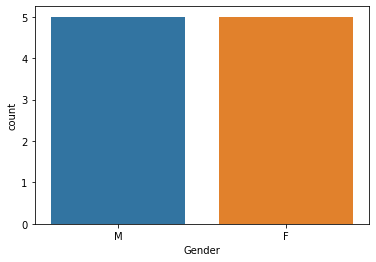

In [9]:
sns.countplot(x='Gender',data=student_marks)

In [10]:
student_marks.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


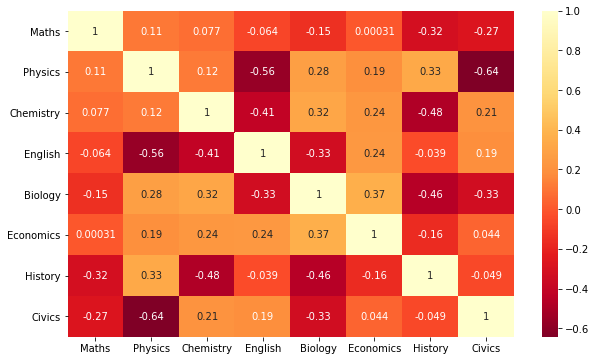

In [11]:
#Missing value treatment

plt.figure(figsize=(10,6))
cor=student_marks.corr()
sns.heatmap(cor,cmap='YlOrRd_r',annot=True)

In [12]:
#group by gender

gender_group = student_marks.groupby('Gender')

In [8]:
#Check columns

student_marks.columns

Index(['Unnamed: 0', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry',
       'English', 'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

In [14]:
#data description as per data 

for i in student_marks.columns:
    print('\n')
    print(i)
    print(gender_group[i].describe())



Gender
       count unique top freq
Gender                      
F          5      1   F    5
M          5      1   M    5


DOB
       count unique         top freq
Gender                              
F          5      4  12-08-1990    2
M          5      4  25-05-1989    2


Maths
        count  mean        std   min   25%   50%   75%   max
Gender                                                      
F         5.0  58.2  12.111978  45.0  55.0  55.0  58.0  78.0
M         5.0  61.0  26.466961  25.0  54.0  55.0  75.0  96.0


Physics
        count  mean        std   min   25%   50%   75%   max
Gender                                                      
F         5.0  81.2  16.574076  63.0  64.0  87.0  96.0  96.0
M         5.0  63.4  22.086195  45.0  46.0  54.0  76.0  96.0


Chemistry
        count  mean        std   min   25%   50%   75%   max
Gender                                                      
F         5.0  73.2  16.084154  52.0  61.0  78.0  86.0  89.0
M         5.0  77.4 

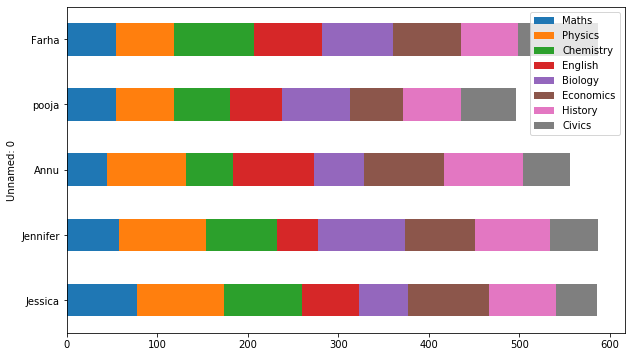

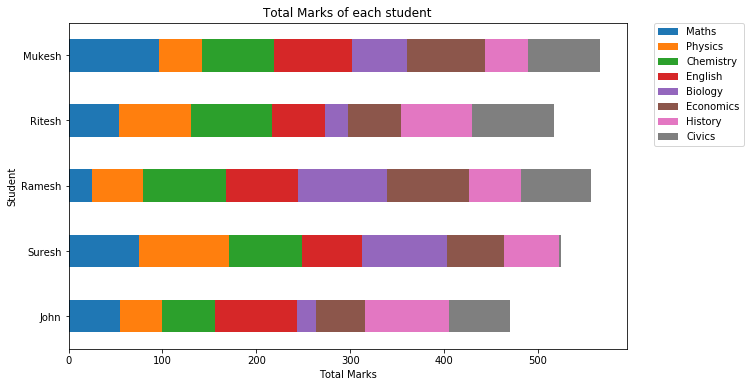

In [15]:
gender_group[['Maths', 'Physics', 'Chemistry', 'English', 'Biology','Economics', 'History', 'Civics']].plot(kind='barh',
                                                                stacked=True, figsize= (10, 6))

plt.xlabel("Total Marks")
plt.ylabel("Student")
plt.title('Total Marks of each student')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

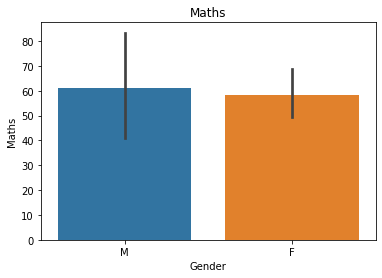

In [16]:
plt.title('Maths')
sns.barplot(x="Gender", y="Maths",data=student_marks)

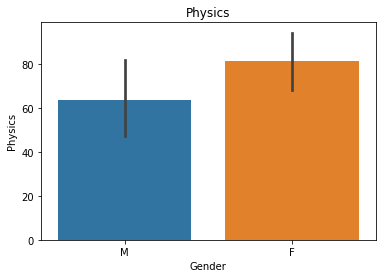

In [17]:
plt.title('Physics')
sns.barplot(x="Gender", y="Physics",data=student_marks)

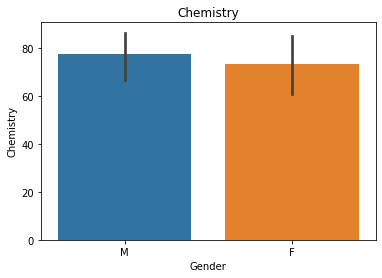

In [18]:
plt.title('Chemistry')
sns.barplot(x="Gender", y="Chemistry",data=student_marks)

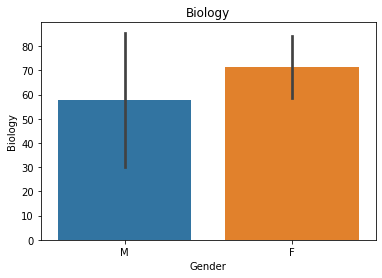

In [19]:
plt.title('Biology')
sns.barplot(x="Gender", y="Biology",data=student_marks)

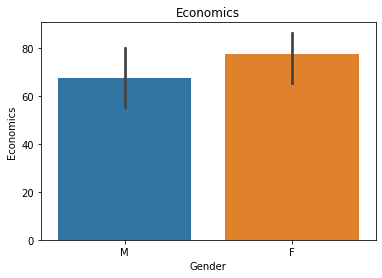

In [20]:
plt.title('Economics')
sns.barplot(x="Gender", y="Economics",data=student_marks)

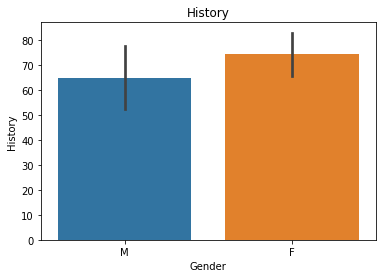

In [21]:
plt.title('History')
sns.barplot(x="Gender", y="History",data=student_marks)

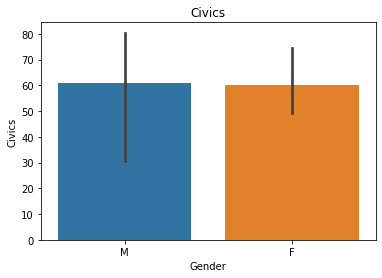

In [22]:
plt.title('Civics')
sns.barplot(x="Gender", y="Civics",data=student_marks)

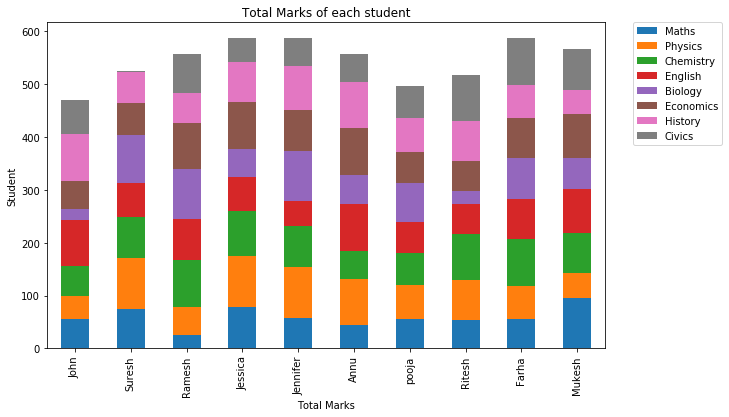

In [23]:
student_marks[['Maths', 'Physics', 'Chemistry', 'English', 'Biology','Economics', 'History', 'Civics']].plot(kind='bar',
                                                                stacked=True, figsize= (10, 6))

plt.xlabel("Total Marks")
plt.ylabel("Student")

plt.title('Total Marks of each student')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Visualisation : Marks Analysis 

Text(0.5, 1.0, 'Total Marks of each student')

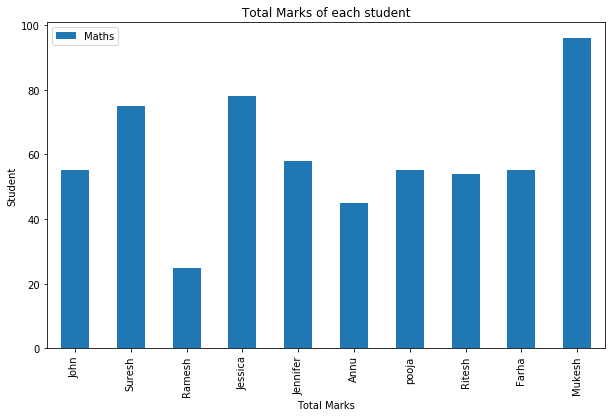

In [24]:
student_marks[['Maths']].plot(kind='bar', figsize= (10, 6))

plt.xlabel("Total Marks")
plt.ylabel("Student")

plt.title('Total Marks of each student')

Text(0.5, 1.0, 'Marks of each student')

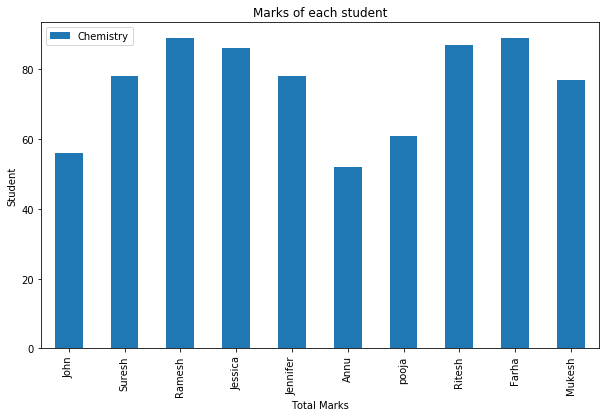

In [25]:
student_marks[['Chemistry']].plot(kind='bar', figsize= (10, 6))

plt.xlabel("Total Marks")
plt.ylabel("Student")

plt.title('Marks of each student')

Text(0.5, 1.0, 'Marks of each student')

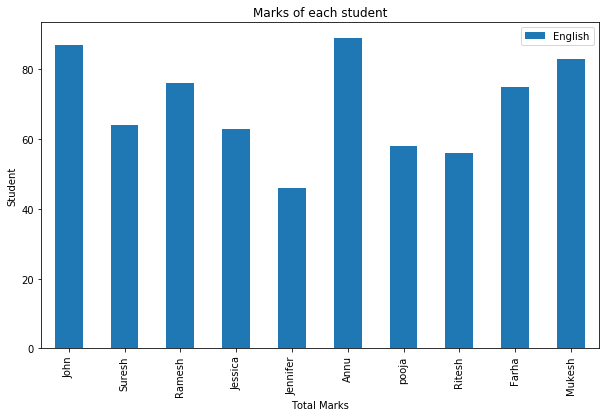

In [26]:
student_marks[['English']].plot(kind='bar', figsize= (10, 6))

plt.xlabel("Total Marks")
plt.ylabel("Student")

plt.title('Marks of each student')

Text(0.5, 1.0, 'Marks of each student')

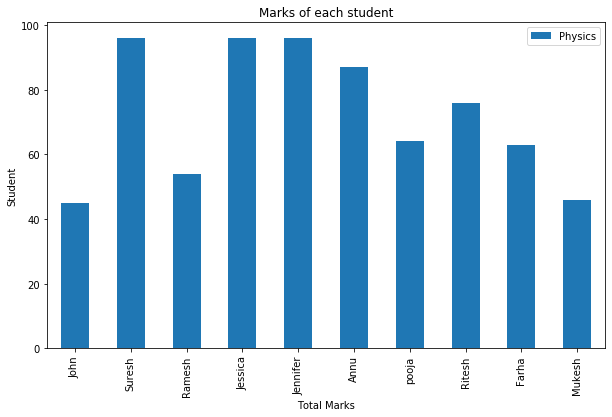

In [27]:
student_marks[['Physics']].plot(kind='bar', figsize= (10, 6))

plt.xlabel("Total Marks")
plt.ylabel("Student")

plt.title('Marks of each student')

Text(0.5, 1.0, 'Marks of each student')

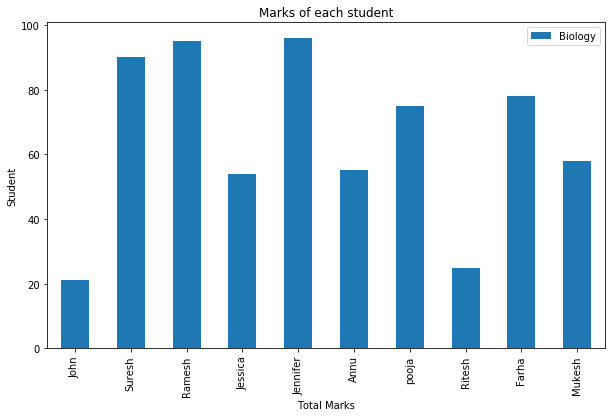

In [28]:
student_marks[['Biology']].plot(kind='bar', figsize= (10, 6))

plt.xlabel("Total Marks")
plt.ylabel("Student")

plt.title('Marks of each student')

Text(0.5, 1.0, 'Marks of each student')

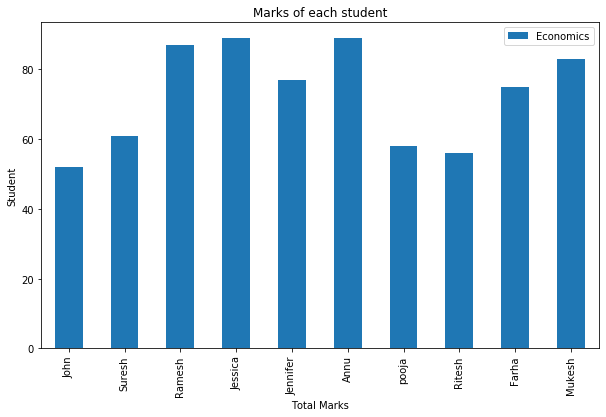

In [29]:
student_marks[['Economics']].plot(kind='bar', figsize= (10, 6))

plt.xlabel("Total Marks")
plt.ylabel("Student")

plt.title('Marks of each student')

Text(0.5, 1.0, 'Marks of each student')

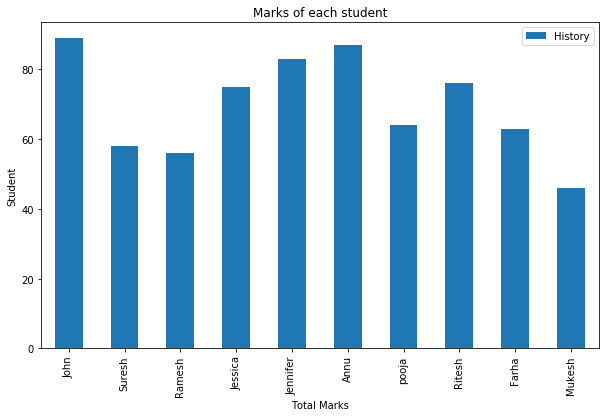

In [30]:
student_marks[['History']].plot(kind='bar', figsize= (10, 6))

plt.xlabel("Total Marks")
plt.ylabel("Student")

plt.title('Marks of each student')

Text(0.5, 1.0, 'Marks of each student')

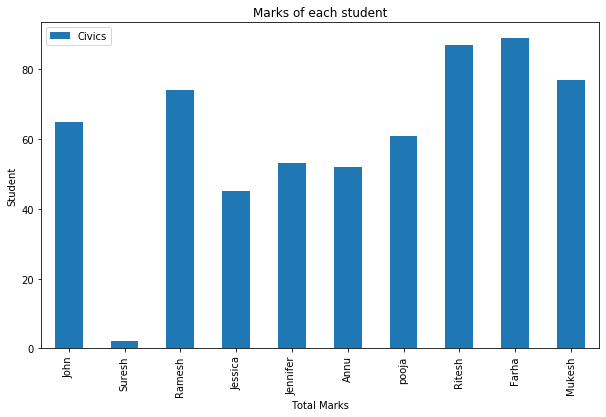

In [31]:
student_marks[['Civics']].plot(kind='bar', figsize= (10, 6))

plt.xlabel("Total Marks")
plt.ylabel("Student")

plt.title('Marks of each student')

In [32]:
student_marks.drop('DOB',axis=1,inplace=True)

Visulaisation : Distribution of Maths marks

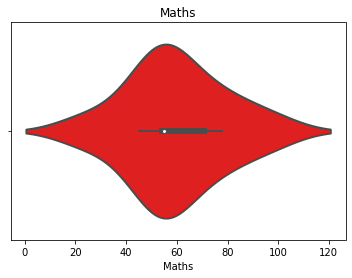

In [33]:
plt.title('Maths')
sns.violinplot(x='Maths',data=student_marks,color='r',linewidth=2)
plt.show()

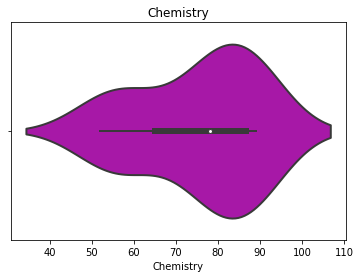

In [34]:
plt.title('Chemistry')
sns.violinplot(x='Chemistry',data=student_marks,color='m',linewidth=2)
plt.show()

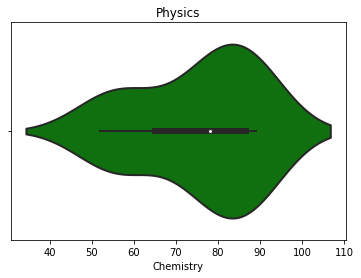

In [35]:
plt.title('Physics')
sns.violinplot(x='Chemistry',data=student_marks,color='g',linewidth=2)
plt.show()

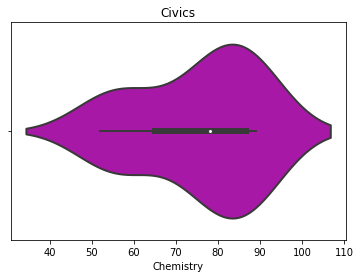

In [36]:
plt.title('Civics')
sns.violinplot(x='Chemistry',data=student_marks,color='m',linewidth=2)
plt.show()

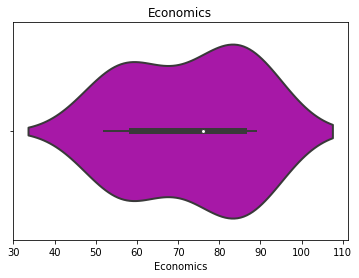

In [37]:
plt.title('Economics')
sns.violinplot(x='Economics',data=student_marks,color='m',linewidth=2)
plt.show()

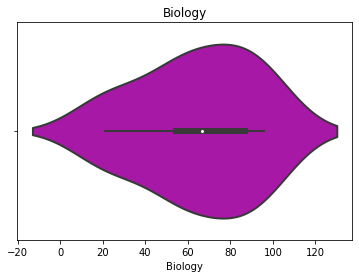

In [38]:
plt.title('Biology')
sns.violinplot(x='Biology',data=student_marks,color='m',linewidth=2)
plt.show()

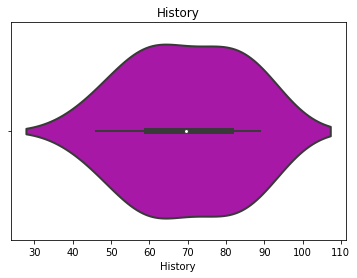

In [39]:
plt.title('History')
sns.violinplot(x='History',data=student_marks,color='m',linewidth=2)
plt.show()

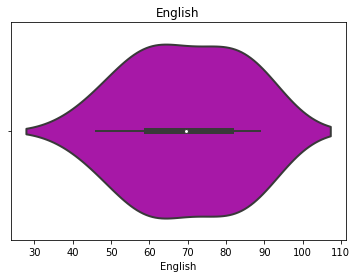

In [40]:
plt.title('English')
sns.violinplot(x='English',data=student_marks,color='m',linewidth=2)
plt.show()

In [41]:
#No outliers
from scipy.stats import zscore
student_marks_final=student_marks.drop('Gender',axis=1)
z=abs(zscore(student_marks_final))
print(student_marks_final.shape)
student_marks_final = student_marks_final.loc[(z < 3).all(axis=1)]
print(student_marks_final.shape)

(10, 8)
(10, 8)
